Data Bootcamp Project - Pet Adoption

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in the data (saved to desktop from Kaggle.com Competiton - Pet Adoption Speed Prediction)

In [2]:
df=pd.read_csv('train.csv')

Begin exploring the dataset

In [3]:
df.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0


In [4]:
df.shape

(14993, 24)

In [5]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


Age is in months.
Gender: 1 is male, 2 is female
Type: 1 are dogs, 2 are cats
Adoption Speed: {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}

Clean up the column names per convention

In [6]:
df.columns=[i.lower() for i in df.columns]

Find the amount of null values by column

In [7]:
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              0
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 0
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

In [8]:
df

,type,name,age,breed1,breed2,gender,color1,color2,color3,maturitysize,...,health,quantity,fee,state,rescuerid,videoamt,description,petid,photoamt,adoptionspeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2,2
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9,3
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6,1
9,2,Kitty,12,265,0,2,1,7,0,2,...,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2,4


Luckily, only name and decription have null values - which is fine (no predictive value)
Name and description don't add any predictive value. Drop the columns

In [9]:
df=df.drop('name',axis=1)
df=df.drop('description',axis=1)
df

,type,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,...,sterilized,health,quantity,fee,state,rescuerid,videoamt,petid,photoamt,adoptionspeed
0,2,3,299,0,1,1,7,0,1,1,...,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1,2
1,2,1,265,0,1,1,2,0,2,2,...,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2,0
2,1,1,307,0,1,2,7,0,2,2,...,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7,3
3,1,4,307,0,2,1,2,0,2,1,...,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8,2
4,1,1,307,0,1,1,0,0,2,1,...,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3,2
5,2,3,266,0,2,5,6,0,2,1,...,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,d24c30b4b,2,2
6,2,12,264,264,1,1,0,0,2,3,...,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,1caa6fcdb,3,1
7,1,0,307,0,2,1,2,7,2,1,...,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,97aa9eeac,9,3
8,2,2,265,0,2,6,0,0,2,2,...,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,c06d167ca,6,1
9,2,12,265,0,2,1,7,0,2,2,...,3,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,7a0942d61,2,4


What percentage of the dataset is dogs vs cats?

In [10]:
df['type'].value_counts()

1    8132
2    6861
Name: type, dtype: int64

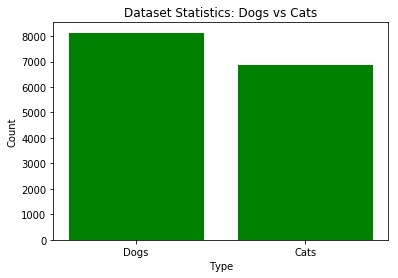

In [11]:
x=['Dogs','Cats']
y=[8132,6861]
plt.bar(x,y,color='g')
plt.title('Dataset Statistics: Dogs vs Cats')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#df['Type'].plot.barh(ax=ax,figsize=(5,5),color='g')
#ax.set_title('Dataset Statistics: Dogs vs Cats')
#ax.set_xlabel('Count')
#ax.set_ylabel('Type')

Plot adoption speed

Text(0, 0.5, 'Adoption Rate')

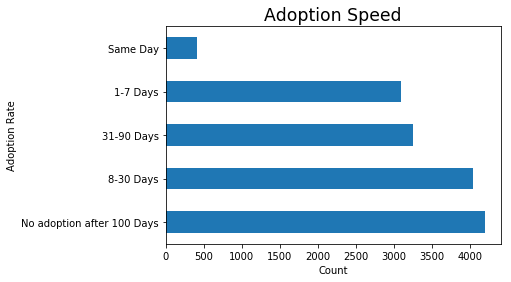

In [12]:
df['adoptionspeed'].value_counts().rename(
    {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}).plot(kind='barh')
plt.title('Adoption Speed', fontsize='xx-large')
plt.xlabel('Count')
plt.ylabel('Adoption Rate')

In [13]:
df['adoptionspeed'].value_counts()

4    4197
2    4037
3    3259
1    3090
0     410
Name: adoptionspeed, dtype: int64

In [14]:
len(df.loc[df['adoptionspeed']==4])/len(df)

0.2799306342960048

Sadly, nearly 28% of all pets in our dataset were not adopted after 100 days

Is the adoption speed better (value=smaller) for dogs or cats?

In [15]:
#I think we will learn more on effective grouping later in course?
adopt_speed_dog=((len(df.loc[(df['adoptionspeed']==0)&(df['type']==1),:])*0)+(len(df.loc[(df['adoptionspeed']==1)&(df['type']==1),:])*1)+(len(df.loc[(df['adoptionspeed']==2)&(df['type']==1),:])*2)+(len(df.loc[(df['adoptionspeed']==3)&(df['type']==1),:])*3)+(len(df.loc[(df['adoptionspeed']==4)&(df['type']==1),:])*4))/len(df['type']==1)
print('Dog adoption speed ' + str(adopt_speed_dog))
adopt_speed_cat=((len(df.loc[(df['adoptionspeed']==0)&(df['type']==2),:])*0)+(len(df.loc[(df['adoptionspeed']==1)&(df['type']==2),:])*1)+(len(df.loc[(df['adoptionspeed']==2)&(df['type']==2),:])*2)+(len(df.loc[(df['adoptionspeed']==3)&(df['type']==2),:])*3)+(len(df.loc[(df['adoptionspeed']==4)&(df['type']==2),:])*4))/len(df['type']==1)
print('Cat adoption speed ' + str(adopt_speed_cat))
if adopt_speed_dog<adopt_speed_cat:
    print('Adoption speed is quicker for dogs')
else:
    print('Adoption speed is quicker for cats')

Dog adoption speed 1.418395251117188
Cat adoption speed 1.09804575468552
Adoption speed is quicker for cats


What is the relationship/correlation between vaccination and adoption speed?

In [20]:
np.corrcoef(df['vaccinated'],df['adoptionspeed'])[0,1]

-0.05904274875792811

#Need to explore further

This is a positive correlation as expected (adoption speed = lower is better)

In [17]:
n

NameError: name 'n' is not defined